In [16]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd
from datetime import *
import plotly.express as px
import numpy as np

# Precio plata diario desde 1968 en EUR USD y GBP

In [2]:
silver = pd.read_excel(r'..\01-Raw_data\02-Silver\02-lbma_silver_am_usd-gbp-eur_1968-01-01_2021-07-22.xlsx')
silver.rename(columns={"DATE": "Date", 'USD': 'Value'}, inplace=True)
silver.set_index('Date', inplace=True)
silver.index = pd.to_datetime(silver.index, format='%Y-%m-%d')

In [3]:
silver

,Value,GBP,EUR
Date,,,
2021-07-22,25.070,18.220,21.26
2021-07-21,25.105,18.450,21.33
2021-07-20,25.095,18.430,21.30
2021-07-19,25.325,18.480,21.51
2021-07-16,26.105,18.910,22.12
...,...,...,...
1968-01-08,2.163,0.898,NaN
1968-01-05,2.157,0.896,NaN
1968-01-04,2.171,0.902,NaN


### Se guarda este dataframe como pickle de los precios de la plata desde 1968

In [6]:
silver.to_pickle(r'..\02-Data\02-Silver\01_Silver_USD-GBP-EUR_1968-01-02_2021-07-22_daily_lbma.pkl')

# Precio plata anual desde 1791 a 2020 en USD

In [11]:
silver_prev = pd.read_csv(r'..\01-Raw_data\02-Silver\01-silver_price_1791_2020_yearly_denvergold.csv')

In [12]:
silver_prev = silver_prev[['Year', 'Nominal ounce closing price USD']]
silver_prev.rename(columns={"Year": "Date", 'Nominal ounce closing price USD': 'Value'}, inplace=True)
silver_prev.set_index('Date', inplace=True)
silver_prev.index = pd.to_datetime(silver_prev.index, format='%Y') + MonthEnd(1)
silver_prev.index = silver_prev.index.map(lambda x: pd.datetime(x.year, 12, x.day))

<ipython-input-12-2f5381640548>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  silver_prev.index = silver_prev.index.map(lambda x: pd.datetime(x.year, 12, x.day))


In [13]:
silver_prev

,Value
Date,
1791-12-31,1.290000
1792-12-31,1.280000
1793-12-31,1.290000
1794-12-31,1.260000
1795-12-31,1.250000
...,...
2016-12-31,17.104235
2017-12-31,17.078580
2018-12-31,15.705742


### Se guarda este dataframe como pickle de los precios anules de la plata desde 1791 en USD

In [16]:
silver_prev.to_pickle(r'..\02-Data\02-Silver\02_Silver_USD_1791-12-31_2020-12-31_yearly_denvergold.pkl')

# Elaboración dataset completo plata

## Lectura datasets

In [47]:
silver = pd.read_pickle(r'..\02-Data\02-Silver\01_Silver_USD-GBP-EUR_1968-01-02_2021-07-22_daily_lbma.pkl')
silver_prev = pd.read_pickle(r'..\02-Data\02-Silver\02_Silver_USD_1791-12-31_2020-12-31_yearly_denvergold.pkl')

### Filtrado dataset silver

In [48]:
silver = silver.drop(['GBP', 'EUR'], axis=1).dropna()
mask_2 = (silver.index >= datetime.strptime('1968-04-01', '%Y-%m-%d'))
silver = silver.loc[mask_2]

In [49]:
silver

,Value
Date,
2021-07-22,25.070
2021-07-21,25.105
2021-07-20,25.095
2021-07-19,25.325
2021-07-16,26.105
...,...
1968-04-05,2.104
1968-04-04,2.125
1968-04-03,2.195


### Filtrado dataset silver_prev

In [29]:
mask = (silver_prev.index < datetime.strptime('1968-04-01', '%Y-%m-%d'))
silver_prev = silver_prev.loc[mask]

In [30]:
silver_prev

,Value
Date,
1791-12-31,1.29
1792-12-31,1.28
1793-12-31,1.29
1794-12-31,1.26
1795-12-31,1.25
...,...
1963-12-31,1.28
1964-12-31,1.29
1965-12-31,1.29


# Se juntan los dataframes filtrados

In [31]:
silver_def = silver.append(silver_prev).sort_index().reset_index().set_index('Date')

In [32]:
silver_def

,Value
Date,
1791-12-31,1.290
1792-12-31,1.280
1793-12-31,1.290
1794-12-31,1.260
1795-12-31,1.250
...,...
2021-07-16,26.105
2021-07-19,25.325
2021-07-20,25.095


In [33]:
silver_def.to_pickle(r'..\02-Data\02-Silver\03_Silver_USD_1791-12-31_2020-07-22_mix.pkl')

## Escala logarítmica plata valor nominal

In [4]:
silver_log = pd.read_pickle(r'..\02-Data\02-Silver\02_Silver_USD_1791-12-31_2020-12-31_yearly_denvergold.pkl')

In [18]:
silver_log.apply(lambda x: np.log(x))

,Value
Date,
1791-12-31,0.254642
1792-12-31,0.246860
1793-12-31,0.254642
1794-12-31,0.231112
1795-12-31,0.223144
...,...
2016-12-31,2.839326
2017-12-31,2.837825
2018-12-31,2.754026


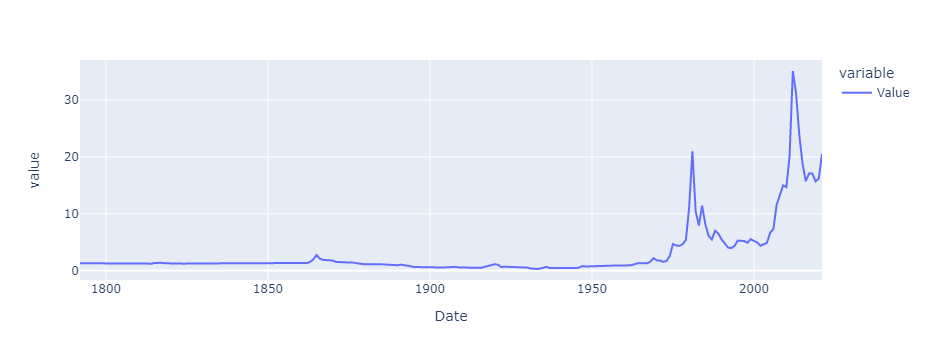

In [19]:
px.line(silver_log)

In [20]:
silver_log.to_pickle(r'..\02-Data\02-Silver\04_Silver_USD_1791-12-31_2020-12-31_yearly_logarithmic_denvergold.pkl')

## Escala logarítmica plata valor real ajustado por inflación

In [25]:
silver_real_log = pd.read_csv(r'..\01-Raw_data\02-Silver\01-silver_price_1791_2020_yearly_denvergold.csv')

In [26]:
silver_real_log

,Year,Real ounce closing price USD,Nominal ounce closing price USD
0,1791,1.290000,1.290000
1,1792,1.280000,1.280000
2,1793,1.290000,1.290000
3,1794,1.260000,1.260000
4,1795,1.250000,1.250000
...,...,...,...
225,2016,17.104235,17.104235
226,2017,17.078580,17.078580
227,2018,15.705742,15.705742
228,2019,16.200110,16.200110


In [27]:
silver_real_log = silver_real_log[['Year', 'Real ounce closing price USD']]
silver_real_log.rename(columns={"Year": "Date", 'Real ounce closing price USD': 'Value'}, inplace=True)
silver_real_log.set_index('Date', inplace=True)
silver_real_log.index = pd.to_datetime(silver_real_log.index, format='%Y') + MonthEnd(1)
silver_real_log.index = silver_real_log.index.map(lambda x: pd.datetime(x.year, 12, x.day))
silver_real_log.apply(lambda x: np.log(x))

C:\Users\serra\Miniconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-f9af8c887e35>:5: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,Value
Date,
1791-12-31,0.254642
1792-12-31,0.246860
1793-12-31,0.254642
1794-12-31,0.231112
1795-12-31,0.223144
...,...
2016-12-31,2.839326
2017-12-31,2.837825
2018-12-31,2.754026


In [28]:
silver_real_log

,Value
Date,
1791-12-31,1.290000
1792-12-31,1.280000
1793-12-31,1.290000
1794-12-31,1.260000
1795-12-31,1.250000
...,...
2016-12-31,17.104235
2017-12-31,17.078580
2018-12-31,15.705742


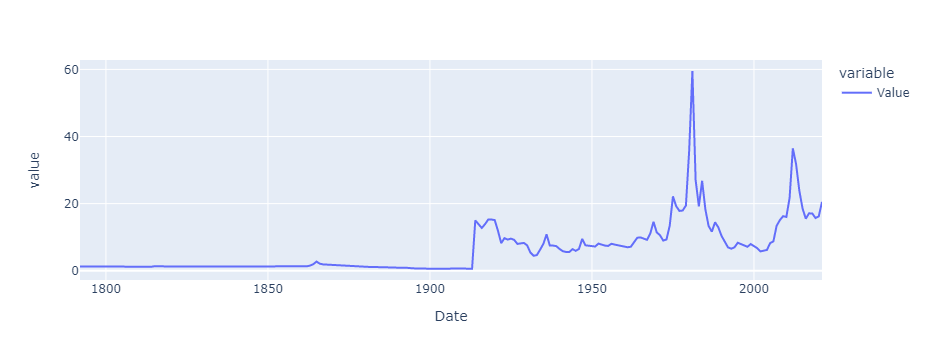

In [29]:
px.line(silver_real_log)

In [31]:
silver_real_log.to_pickle(r'..\02-Data\02-Silver\05-Silver_USD_inflation-adjusted_1791-12-31_2020-12-31_yearly_logarithmic_denvergold.pkl')